In [2]:
import load
import oed
import figure

In [5]:
# jsonファイルの読み込み
result = load.load_result_json("../result/Result.json")

gene = result[0]["gene"]

N, M, theta, w_on, w_off, w, g, w_osc, w_nmj = oed.weight(gene)
alpha, x_peak, y_peak, dt, T, f, v, time, tau = oed.constant("setting")
N_, M_, f_inv, T_ = oed.time_constant_step(gene, "setting")

In [ ]:
result_json_file_path = "../result/Result_aiz_negative.json"
limit_or_unlimit = "limited"
gene_range = 30
use_function = [
    # "connectome",
    "newron_output",
    "Bearing_vs_Turing_bias",
    "Normal_gradient_vs_Turing_bias",
    "Translational_gradient_vs_Turing_bias",
    # "trajectory",
    # "trajectory_membrane_potential",
]

figure.all_figure_create(
    result_json_file_path, limit_or_unlimit, gene_range, use_function
)

In [6]:
import glob

connectome = sorted(glob.glob("../figure/unlimited/connectome/*"))
newron_output = sorted(glob.glob("../figure/unlimited/newron/*"))
Bearing_vs_Turing_bias = sorted(
    glob.glob("../figure/unlimited/bearing_vs_turning_bias/*")
)
for file in Bearing_vs_Turing_bias:
    print(file)

../figure/unlimited/bearing_vs_turning_bias/b_vs_t_0.png
../figure/unlimited/bearing_vs_turning_bias/b_vs_t_1.png
../figure/unlimited/bearing_vs_turning_bias/b_vs_t_2.png
../figure/unlimited/bearing_vs_turning_bias/b_vs_t_3.png
../figure/unlimited/bearing_vs_turning_bias/b_vs_t_4.png
../figure/unlimited/bearing_vs_turning_bias/b_vs_t_5.png
../figure/unlimited/bearing_vs_turning_bias/b_vs_t_6.png
../figure/unlimited/bearing_vs_turning_bias/b_vs_t_7.png
../figure/unlimited/bearing_vs_turning_bias/b_vs_t_8.png
../figure/unlimited/bearing_vs_turning_bias/b_vs_t_9.png


In [57]:
import load
import json
import numpy as np

gene_number = 3
start = 0
stop = 1
num = 10


result = load.load_result_json("../result/Result_aiz_negative.json")
base_gene = np.array(result[gene_number]["gene"])

change_result = []
for delta_gene in np.linspace(start, stop, num + 1):
    zero_gene = np.zeros_like(base_gene)
    zero_gene[10:12] = [delta_gene] * 2
    change_gene = base_gene + zero_gene
    change_result.append({"value": delta_gene, "gene": change_gene.tolist()})

json_data = json.dumps(change_result, indent=1)
with open(
    "../analysis/Result_aiz_negative_{}/Result_aiz_negative_{}.json".format(
        gene_number, gene_number
    ),
    "w",
) as json_file:
    json_file.write(json_data)

In [ ]:
import load
import figure

gene_number = 0

result = load.load_result_json(
    "../analysis/Result_aiz_negative_{}/Result_aiz_negative_{}.json".format(
        gene_number, gene_number
    )
)
connectome_file_path_base = (
    "../analysis/Result_aiz_negative_{}/figure/connectome/connectome_".format(
        gene_number
    )
)
N_T_in_file_path_base = "../analysis/Result_aiz_negative_{}/output/nomal_gradient_vs_turning_bias/n_vs_t_".format(
    gene_number
)
N_T_out_file_path_base = "../analysis/Result_aiz_negative_{}/figure/nomal_gradient_vs_turning_bias/n_vs_t_".format(
    gene_number
)
membrane_potential_file_path_base = "../analysis/Result_aiz_negative_{}/figure/trajectory_membrane_potential/trajectory_membrane_potential_".format(
    gene_number
)
newron_file_path_base = (
    "../analysis/Result_aiz_negative_{}/figure/newron/newron_".format(gene_number)
)

for i in range(11):
    gene = result[i]["gene"]
    # file_path = "{}{}".format(connectome_file_path_base, i)
    # figure.connectome(gene, file_path)
    # in_file_path = "{}{}.txt".format(N_T_in_file_path_base, i)
    # out_file_path = "{}{}".format(N_T_out_file_path_base, i)
    # figure.Normal_gradient_vs_Turing_bias(in_file_path, out_file_path)
    # file_path = "{}{}".format(membrane_potential_file_path_base, i)
    # figure.trajectory_membrane_potential(gene, 10, file_path)
    file_path = "{}{}".format(newron_file_path_base, i)
    figure.newron_output(gene, file_path)

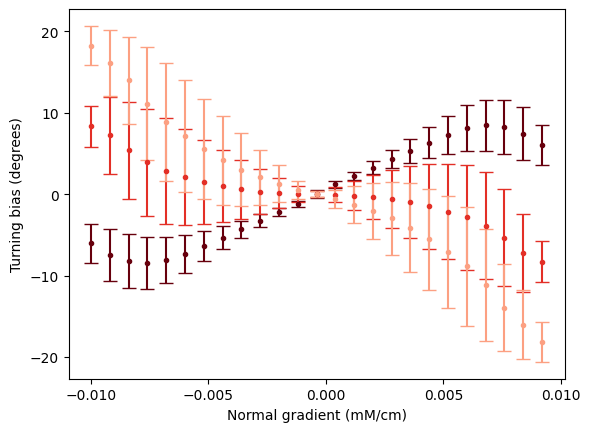

In [51]:
import load
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def Normal_gradient_vs_Turing_bias_concentration_memory(in_file_paths, out_file_path):
    for i, in_file_path in enumerate(in_file_paths):
        data = load.load_output_txt(in_file_path)
        color = cm.Reds(1 - i / len(in_file_paths))

        plt.errorbar(
            data[0],
            data[1],
            yerr=data[2],
            capsize=5,
            fmt="o",
            markersize=3,
            ecolor=color,
            markeredgecolor=color,
            color=color,
        )

    plt.xlabel("Normal gradient (mM/cm)")
    plt.ylabel("Turning bias (degrees)")
    plt.xticks([-0.01, -0.005, 0, 0.005, 0.01])
    # plt.yticks([-40, -20, 0, 20, 40])

    plt.savefig(out_file_path, dpi=300)
    plt.show()

    return


Result_aiz_negative_0_file_paths = sorted(
    glob.glob("../analysis/Result_aiz_negative_0/*")
)[8:]
Normal_gradient_vs_Turing_bias_concentration_memory(
    Result_aiz_negative_0_file_paths,
    "../analysis/Normal_gradient_vs_Turing_bias_concentration_memory",
)